We received about an hour's worth of magnetic sensor scan data of a Vacuum Arc Remelter from our project partner.

Here's the setup involved for importing the data into a Pandas dataframe.

In [13]:
# Required libraries.
from nptdms import TdmsFile
import numpy as np
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

tdms_file = TdmsFile.read(r"C:\Users\jflesch\Capstone\magnetic-flux-anomaly-detection\Test Data\VAR3---12m-15d-20y-14h-27m_SO_SGeo.tdms") # Read in tdms file.

df = tdms_file.as_dataframe() # Convert tdms file to Pandas dataframe.
#print(df['/\'Measurements\'/\'P16C10z\''])

This code allows for printing of pairs of scans by a given sensor type ('r', 't', or 'z'), based on the breakpoint.  If the breakpoint is 2, the loop will print the sensor data from sensors 1 and 2.  If the breakpoint is set to 25, the loop will print the sensor data from sensors 24 and 25.

/'Measurements'/'P01C01r'
/'Measurements'/'P01C02r'


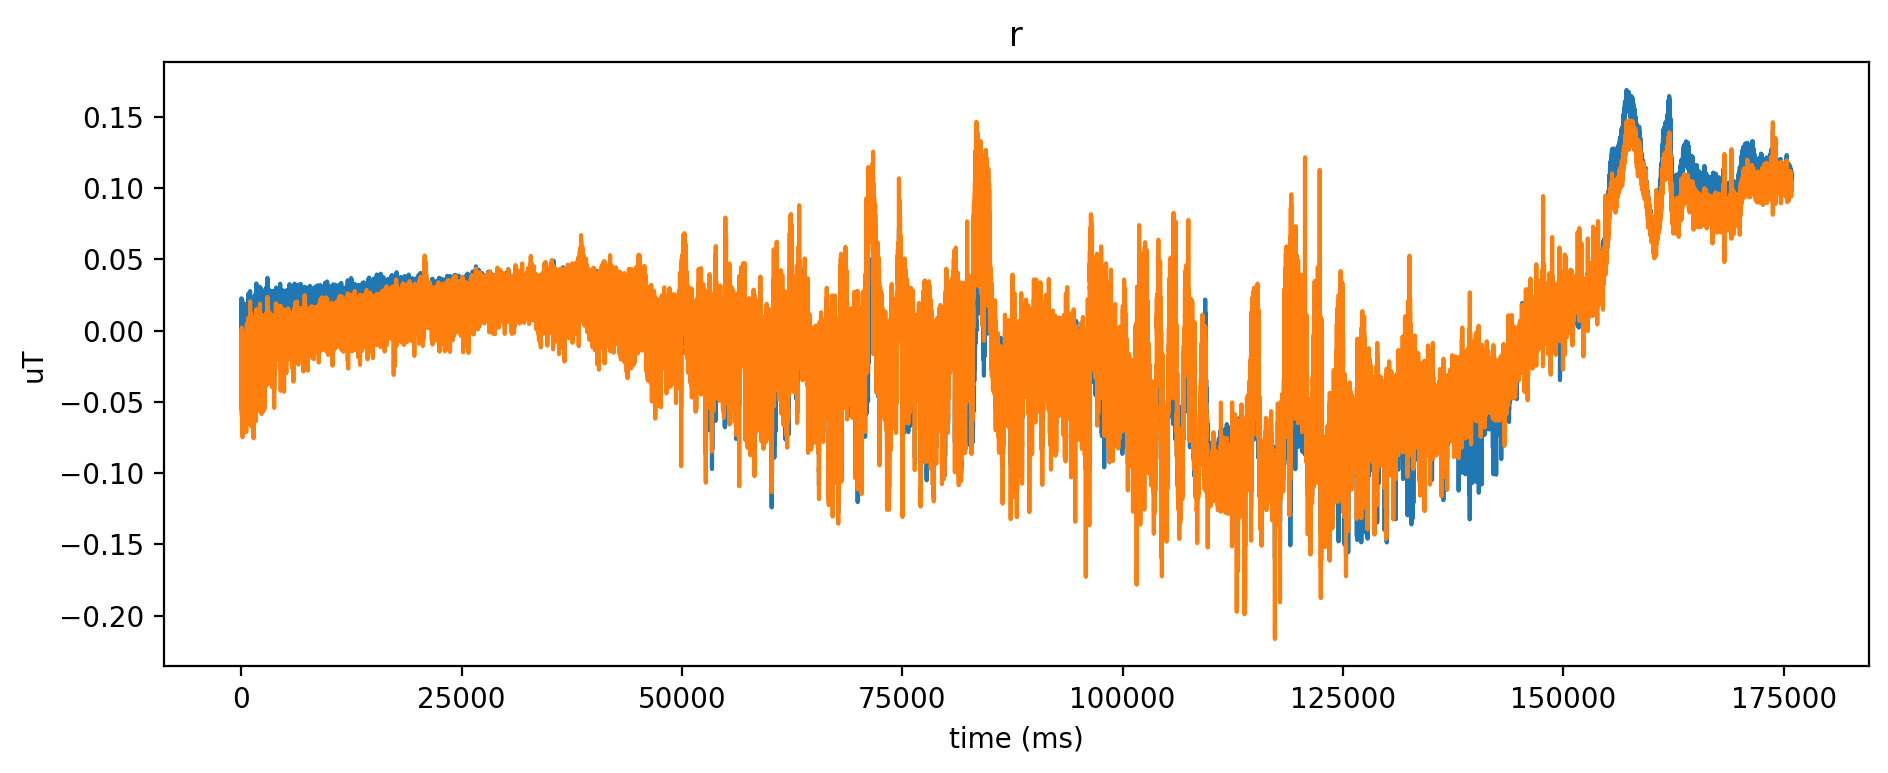

/'Measurements'/'P01C01t'
/'Measurements'/'P01C02t'


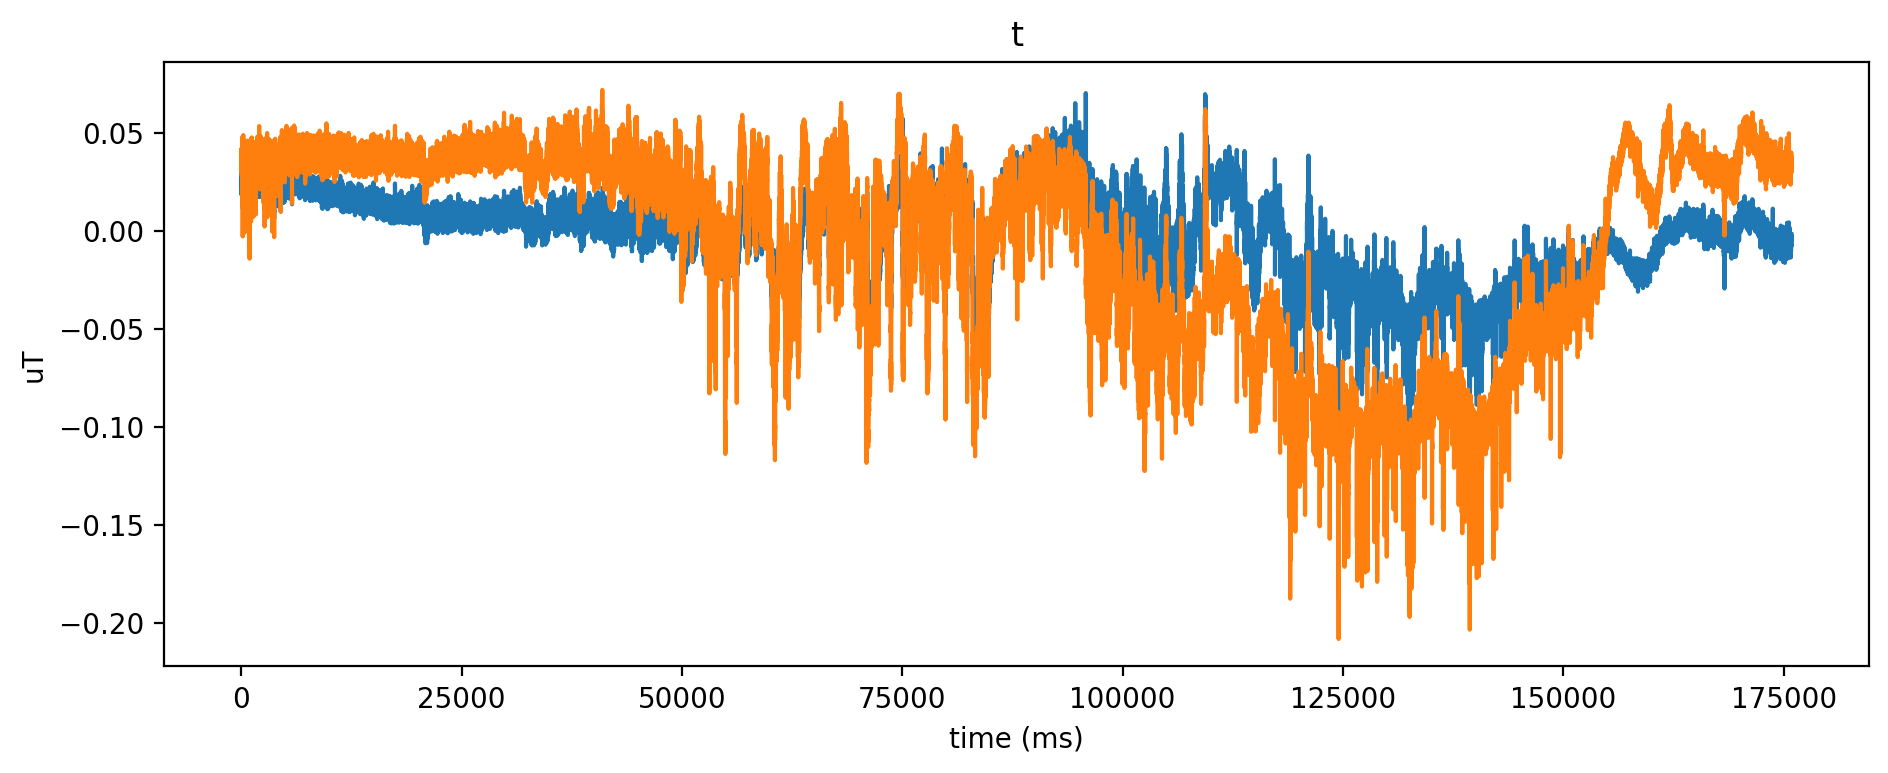

/'Measurements'/'P01C01z'
/'Measurements'/'P01C02z'


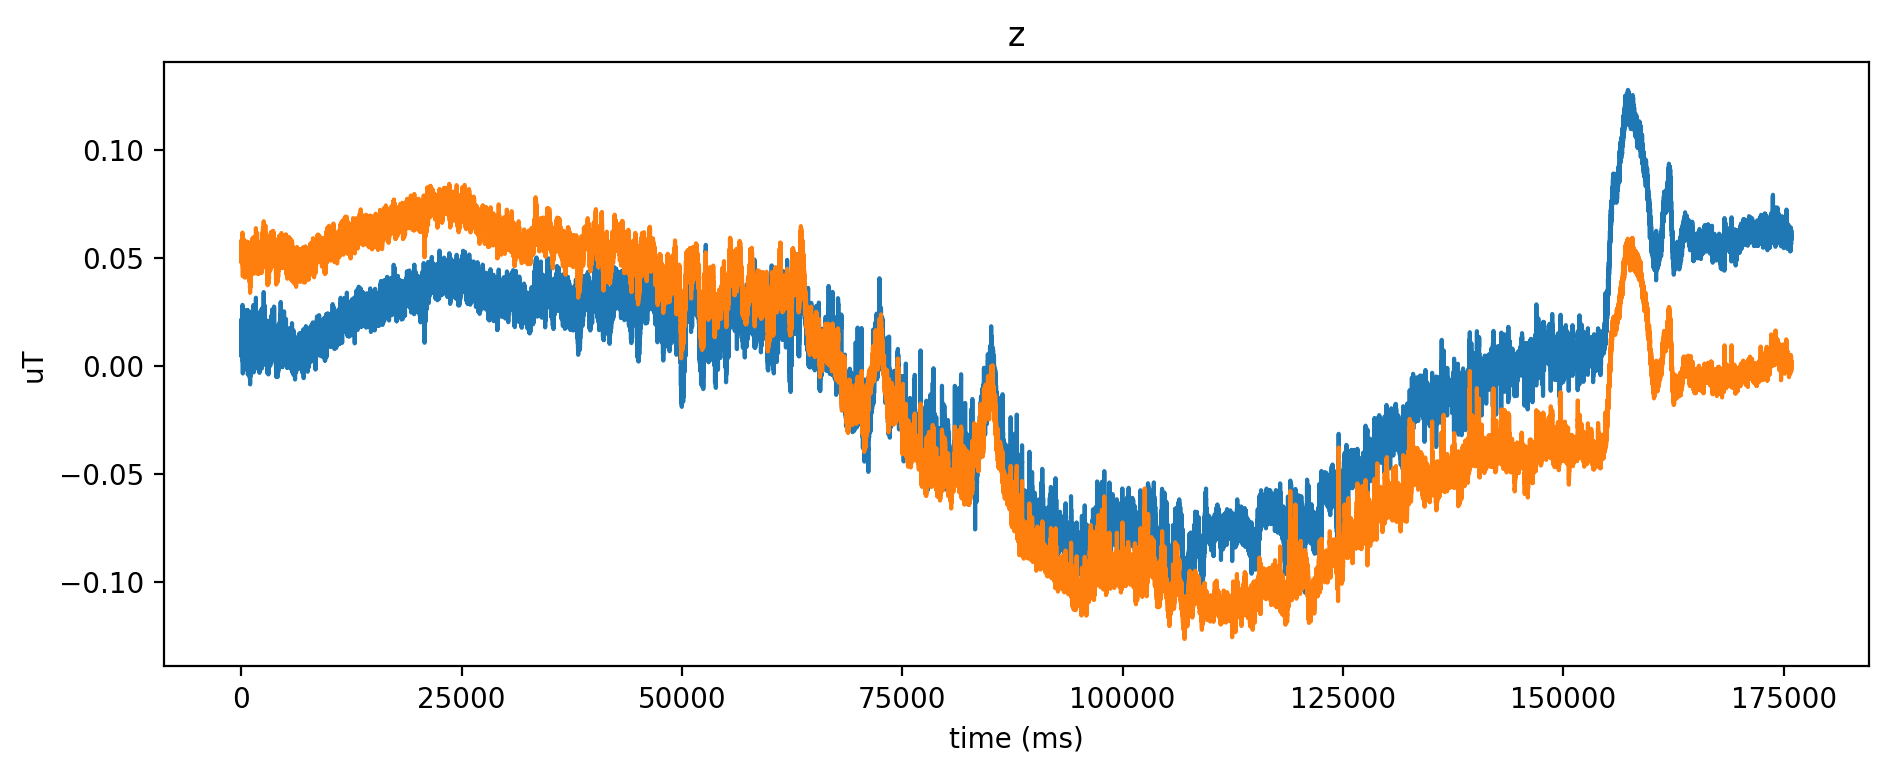

In [4]:
breakpoint = 2

for c in ['r', 't', 'z']:
    count = 0
    plt.figure(figsize=(11, 4), dpi=200)
    
    for col in df:
        if(str(col)[17] == "P" and str(col)[-2] == c): # Columns that are sensor data have a P in the 17th index of the column name.
            count += 1
            if count >= breakpoint-1:
                print(col)
                plt.plot(df[col]) # Plot this data.
                if count == breakpoint:
                    break

    plt.ylabel("uT")
    plt.xlabel("time (ms)")
    plt.title(c)
    plt.show() # Show all data in one plot.

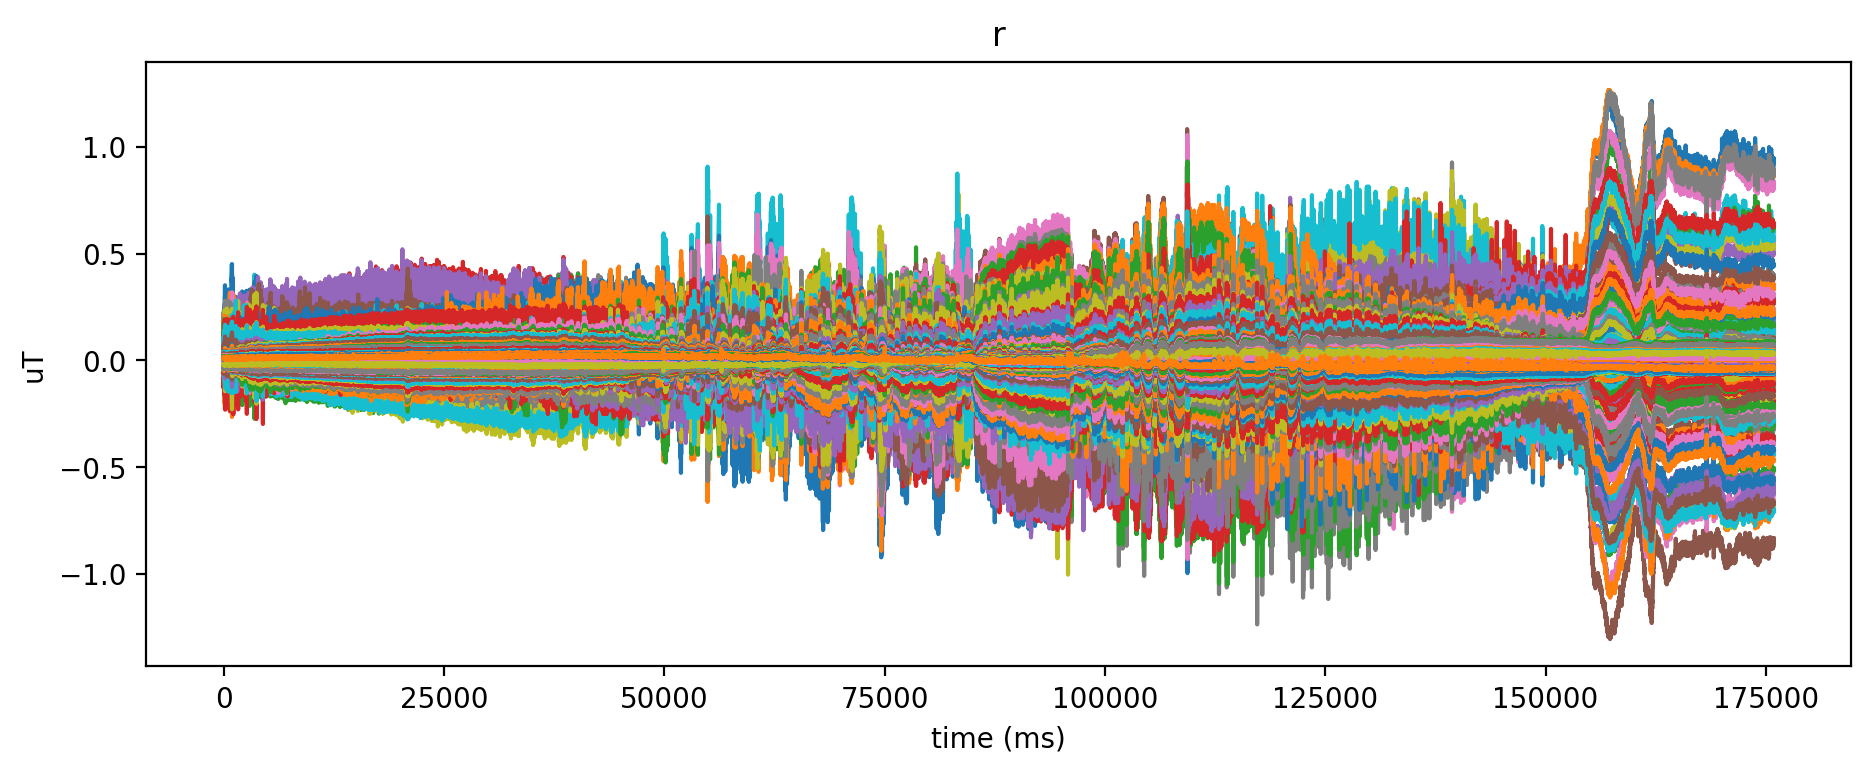

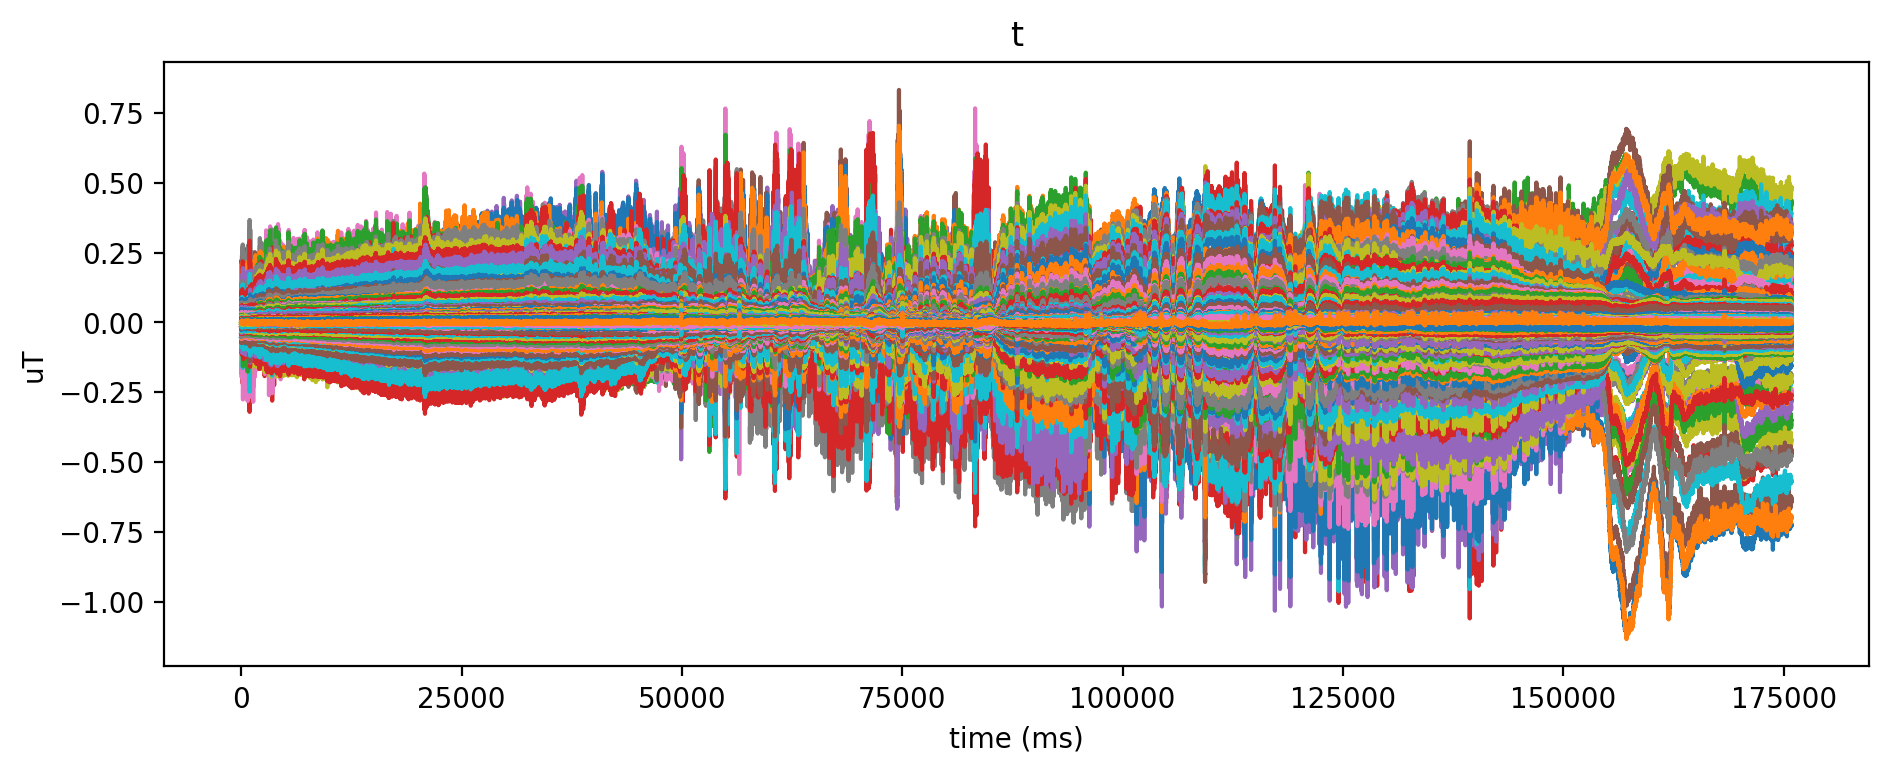

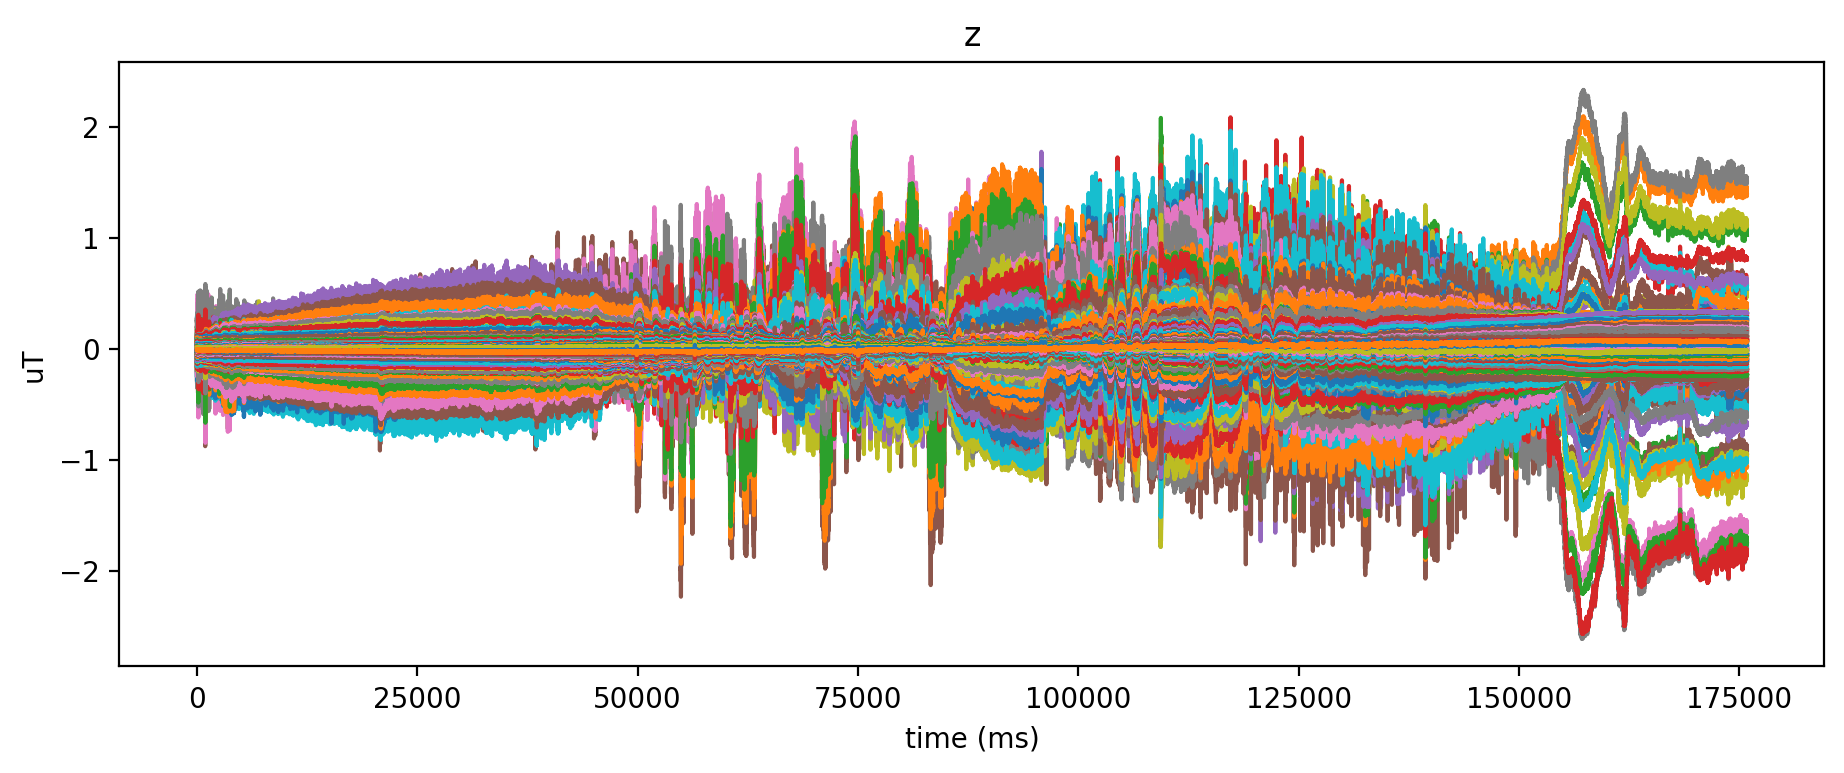

In [5]:
for c in ['r', 't', 'z']:
    plt.figure(figsize=(11, 4), dpi=200)
    #plt.subplot() # Add a subplot to our plot for this data.

    #print(df['/\'Measurements\'/\'Furnace Current\'']) # How to access a specific row in the dataframe.
    #print(df['/\'Measurements\'/\'P16C10z\'']) 

    for col in df:
        #print(col)
        if str(col)[17] == "P" and str(col)[-2] == c: # Columns that are sensor data have a P in the 17th index of the column name.
            #print(df[col]) # Print the data within this dataframe column.
            plt.plot(df[col]) # Plot this data.
            #plt.plot(df[col].mean(), color="black", label="Rolling Mean")
            #plt.plot(rollstd[col], color="red", label="Rolling Std")
            #plt.show() # Show this given plot.

    plt.ylabel("uT")
    plt.xlabel("time (ms)")
    #plt.legend(loc='best')
    plt.title(c)

plt.show() # Show all data in one plot.

Data normalization completed.


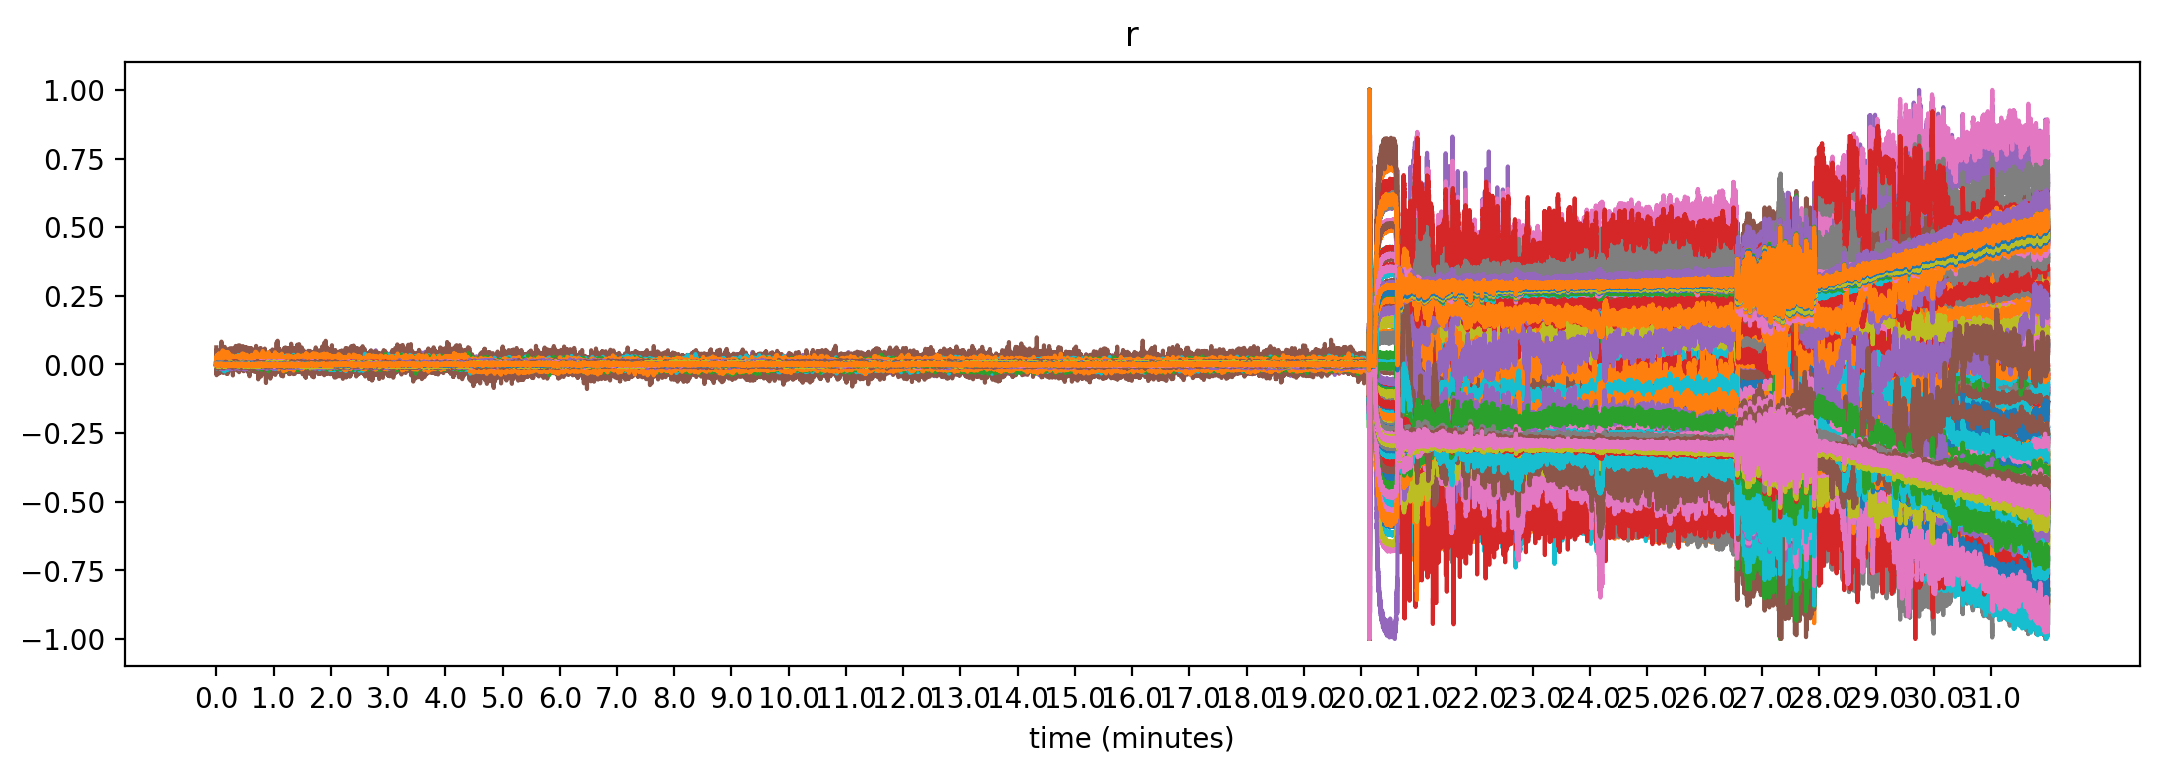

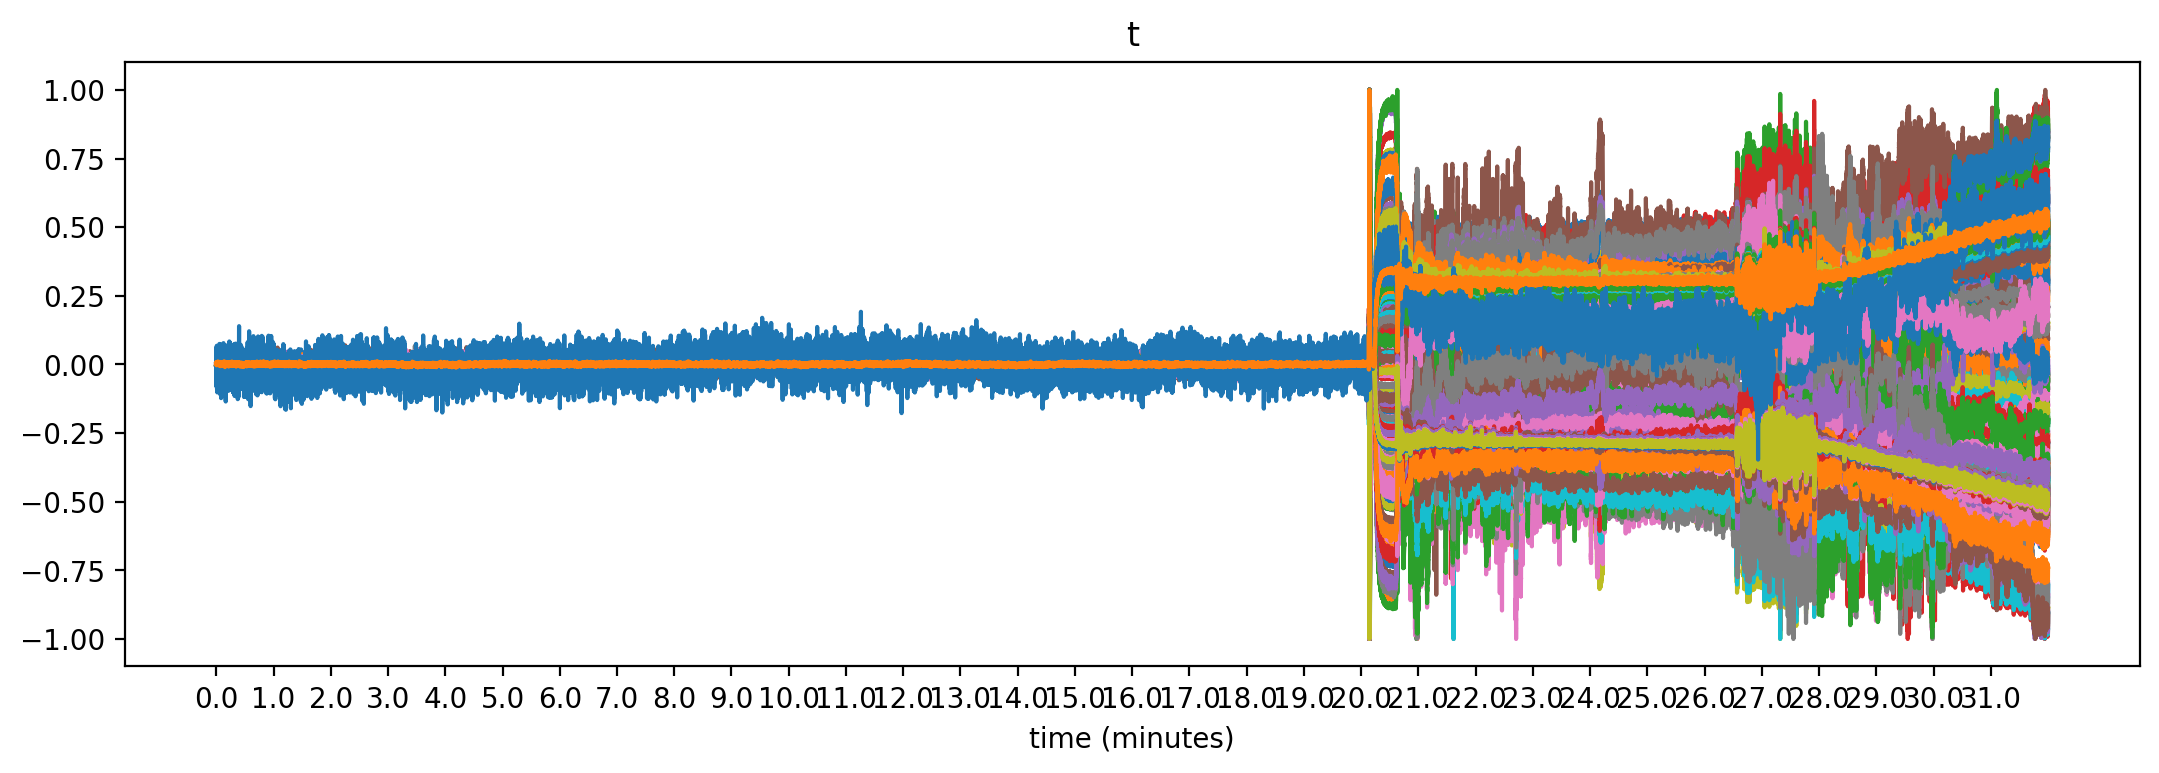

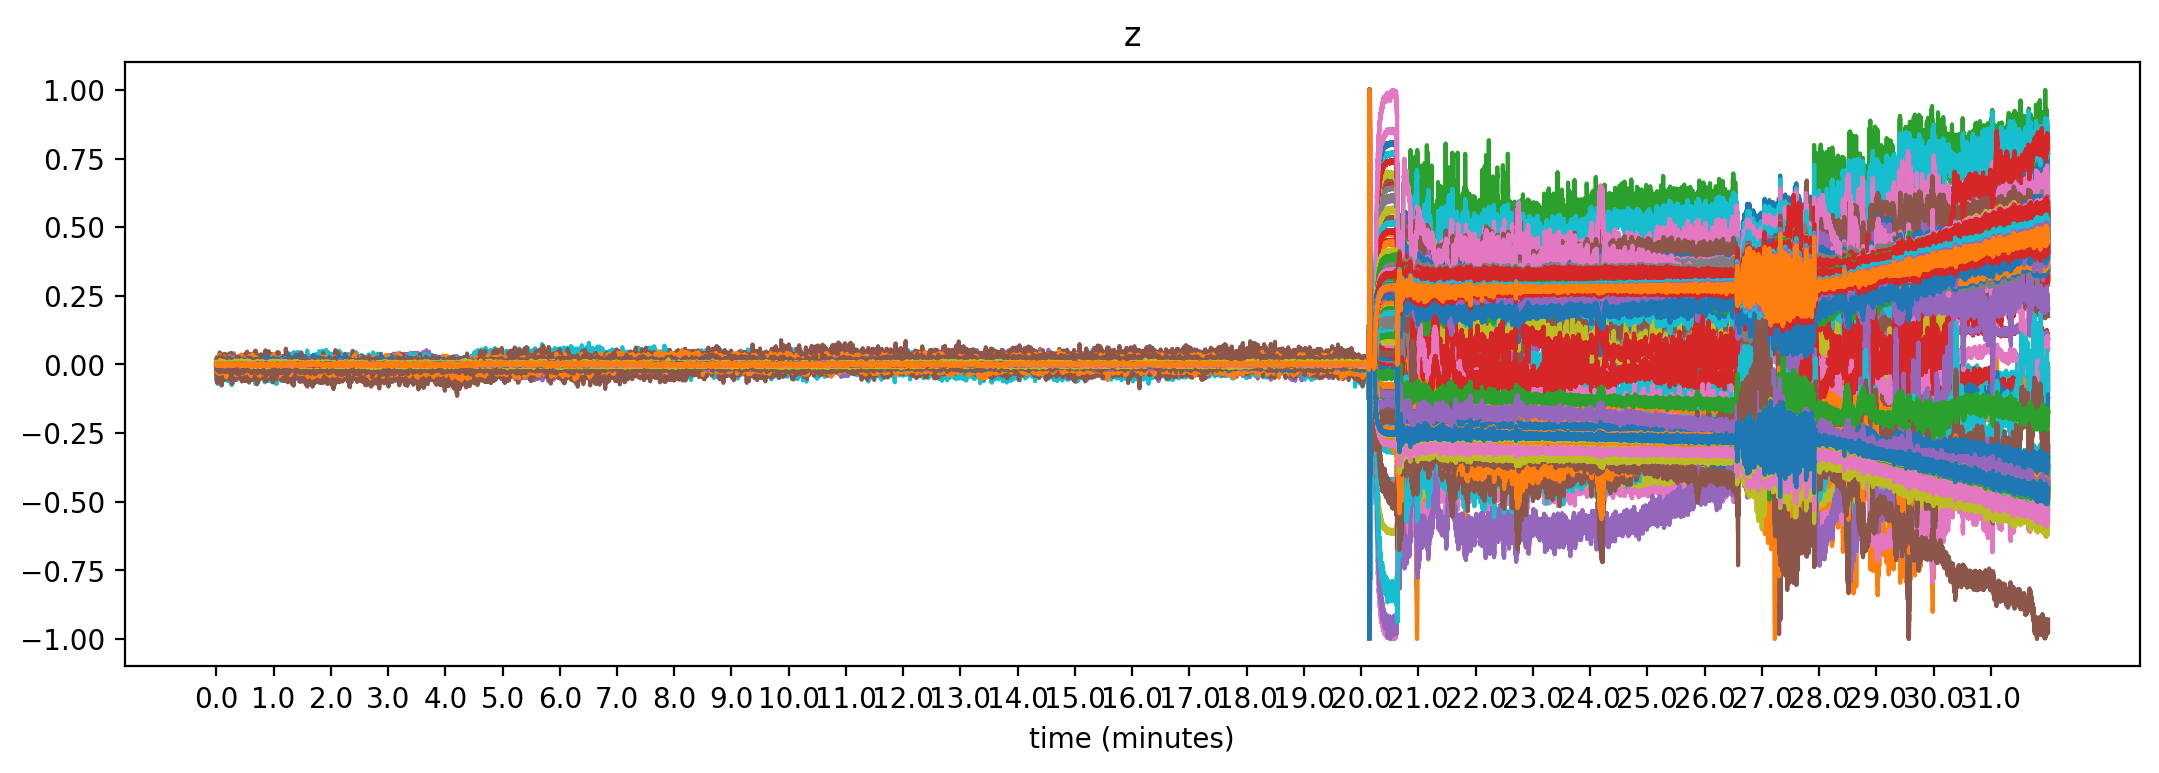

In [14]:
for col in df.columns:
    df[col] = df[col] / df[col].abs().max()
print("Data normalization completed.")

for c in ['r', 't', 'z']:
    plt.figure(figsize=(13, 4), dpi=200)

    for col in df:
        #print(col)
        if str(col)[17] == "P" and str(col)[-2] == c: # Columns that are sensor data have a P in the 17th index of the column name.
            plt.plot(df[col]) # Plot this data.

    # Fix x-axis scaling.
    xmin, xmax = plt.xlim() # Get bounds for current plot. 
    minute_labels = np.arange(0, xmax * (0.01/60), 1) # Convert ms to minutes.
    x_values = np.arange(0, len(df[col]), (len(df[col]) / len(minute_labels))) # Get which datapoint should have which minute.
    plt.xticks(x_values, (minute_labels)) # Change xticks.

    # Add labels.
    plt.title(c)
    #plt.ylabel("uT")
    plt.xlabel("time (minutes)")

plt.show() # Show all data in one plot.

That's all.